<a href="https://colab.research.google.com/github/sanchitag507/Encipher_text_classification/blob/main/ENCIPHER_FINAL_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit Agreements are legal contracts agreed and signed between different parties involved in
transaction, some are Borrower who borrows money, Lenders are one or more parties who come 
together to fund the borrower’s request, Agents are legal bodies who mediate this transaction.
Provided below are some of the legal clauses extracted from Credit Agreements. It also provides 
what type of legal clause they belong to. Your mission is to come up with a model that will help 
classify the given passages into it’s legal clause type.** 

In [ ]:
#import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path=input('Enter the path to dataset:')

Enter the path to dataset/content/dataset.csv


In [ ]:
df = pd.read_csv(path)#read the dataset csv file

In [ ]:
pathoftest=input('Enter the path of test dataset:')

Enter the path of test dataset:/content/test_dataset.csv


In [ ]:
test_set=pd.read_csv(pathoftest)# read the test data set file

In [ ]:
#detects missing values and remove them
df = df[pd.notnull(df['Class'])]

In [ ]:
#print dataset
print(df.head(26))

                Class                                             clause
0            Preamble  This CREDIT AGREEMENT is entered into as of No...
1            Preamble  This agreement is dated 22 December 2014 and m...
2       Governing Law  This Agreement and shall be governed by and in...
3       Governing Law  The choice of South African law as the governi...
4       Governing Law  This agreement and other loan documents shall ...
5               Other  Eligible receivables are not subject to any li...
6               Other  “Acceptance Condition” means the condition wit...
7     Indemnification  Borrowers will indemnify each Lender against a...
8     Indemnification  The Borrower shall indemnify all parties, and ...
9     Indemnification  Administrative Agent shall be entitled to reim...
10    Indemnification  Syndication Agent shall be entitled to reimbur...
11  Lender Defaulting  Defaulting Lender’s right to approve or disapp...
12  Lender Defaulting  Lender during the defaulting

In [ ]:
#print total words in clauses
print(df['clause'].apply(lambda x: len(x.split(' '))).sum())
unq_label=df.Class.unique()
num_label=len(unq_label) #total no of unique labels
print(unq_label)

974
['Preamble' 'Governing Law' 'Other' 'Indemnification' 'Lender Defaulting']


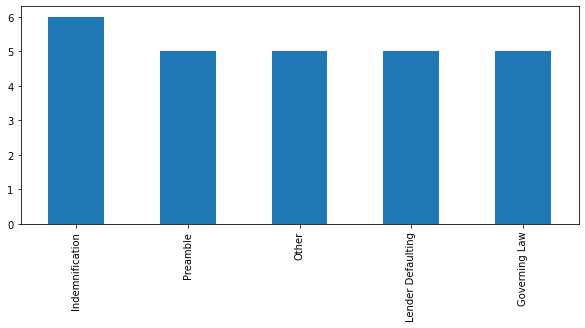

In [ ]:
plt.figure(figsize=(10,4))
df.Class.value_counts().plot(kind='bar') # plot the frequency curve

# Pre Processing

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from bs4 import BeautifulSoup#Beautiful Soup is a Python package for parsing HTML and XML documents.

In [ ]:
import re

In [ ]:
REPLACE_BY_SPACE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
Lemma=WordNetLemmatizer()

In [ ]:
def text_cleaning(txt):
  txt = BeautifulSoup(txt, "lxml").text # HTML decoding
  txt=txt.lower() #de capitalize
  txt = REPLACE_BY_SPACE.sub(' ', txt)
  txt = BAD_SYMBOLS.sub(' ', txt)   #remove bad words
  txt = ' '.join(word for word in txt.split() if word not in STOPWORDS)   #remove stopwords
  txt = ' '.join(Lemma.lemmatize(word) for word in txt.split())  #Lemmatization
  return txt
df['clause'] = df['clause'].apply(text_cleaning)

In [ ]:
print(df)

                Class                                             clause
0            Preamble  credit agreement entered november 23 2010 amon...
1            Preamble  agreement dated 22 december 2014 made party xy...
2       Governing Law  agreement shall governed interpreted accordanc...
3       Governing Law  choice south african law governing law finance...
4       Governing Law  agreement loan document shall governed adheren...
5               Other  eligible receivables subject limitation assign...
6               Other  acceptance condition mean condition respect nu...
7     Indemnification  borrower indemnify lender loss expense may sus...
8     Indemnification  borrower shall indemnify party related party f...
9     Indemnification  administrative agent shall entitled reimbursem...
10    Indemnification  syndication agent shall entitled reimbursement...
11  Lender Defaulting  defaulting lender right approve disapprove ame...
12  Lender Defaulting  lender defaulting period res

# Feature Engineering

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

In [ ]:
#Spliting the dataset into test and train
X = df.clause
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 42)

In [ ]:
print(y_test)

8       Indemnification
16      Indemnification
0              Preamble
24                Other
11    Lender Defaulting
9       Indemnification
Name: Class, dtype: object


In [ ]:
import gensim  #Gensim is an open-source library for unsupervised topic modeling and natural language processing, using modern statistical machine learning.

**doc2vec with logistic regression**


> Doc2vec is an NLP tool for representing documents as a vector and is a generalizing of the word2vec method


> Numeric representation of text documents is a challenging task in machine learning. There are simplistic method like bag of words (BOW), but outcomes will be mostly mediocre, since BOW loses many subtleties of a possible good representation, e.g consideration of word ordering.


> The goal of doc2vec is to create a numeric representation of a document, regardless of its length. So instead of using just words to predict the next word, we also added another feature vector, which is document-unique.
So, when training the word vectors W, the document vector D is trained as well, and in the end of training, it holds a numeric representation of the document.


> While the word vectors represent the concept of a word, the document vector intends to represent the concept of a document. Two algorithms are- “distributed memory” (DM) and “distributed bag of words” (DBOW)









In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from gensim.models.doc2vec import TaggedDocument


#we tag every clause with its Class
def label_sentences(corpus, label_type):
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    return labeled

X_train, X_test, y_train, y_test = train_test_split(df.clause, df.Class, random_state=0, test_size=0.2)#split data into train and test
X_train = label_sentences(X_train, 'Train')
print(X_test)
X_test = label_sentences(X_test, 'Test')
print(X_test)
all_data = X_train + X_test

2     agreement shall governed interpreted accordanc...
20    credit agreement made entered march 6 2018 amo...
14    applicable rate mean following percentage per ...
17    credit agreement entered december 11 2016 amon...
5     eligible receivables subject limitation assign...
11    defaulting lender right approve disapprove ame...
Name: clause, dtype: object
[TaggedDocument(words=['agreement', 'shall', 'governed', 'interpreted', 'accordance', 'law', 'state', 'new', 'york'], tags=['Test_0']), TaggedDocument(words=['credit', 'agreement', 'made', 'entered', 'march', '6', '2018', 'among', 'xyz', 'corp', 'wisconsin', 'corporation', 'borrower', 'ssb', 'bank', 'usa', 'capacity', 'collateral', 'agent', 'bsb', 'bank', 'plc', 'capacity', 'administrative', 'agent', 'behalf', 'lender'], tags=['Test_1']), TaggedDocument(words=['applicable', 'rate', 'mean', 'following', 'percentage', 'per', 'annum', 'based', 'upon', 'consolidated', 'leverage', 'ratio', 'set', 'forth', 'recent', 'compliance', 'cer

In [ ]:
#we instantiate a doc2vec model — Distributed Bag of Words (DBOW)
#building a vocabulary
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(30):#train for 30 epochs
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 26/26 [00:00<00:00, 194042.53it/s]


In [ ]:
#building the final vector features for the classifier
def getVectors(model, c_size, v_size, v_type):
    vectors = np.zeros((c_size, v_size))
    for i in range(0, c_size):
        prefix = v_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = getVectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = getVectors(model_dbow, len(X_test), 300, 'Test')
print(test_vectors_dbow)

[[-0.05004176  0.06987847 -0.00711292 ...  0.02999261 -0.00556256
   0.06369469]
 [-0.07871911  0.08655566  0.00113279 ...  0.04610838  0.00870515
   0.09523637]
 [-0.09353836  0.10623754 -0.00992433 ...  0.05178951  0.01055835
   0.09916506]
 [-0.07809273  0.09517617 -0.00099618 ...  0.04501493  0.01290861
   0.08088879]
 [-0.06771468  0.11035387 -0.00505751 ...  0.06518243 -0.00079662
   0.10221663]
 [-0.05796475  0.07988009 -0.01757224 ...  0.02748345  0.00193572
   0.07908166]]


In [ ]:
#training the logistic regression model
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors_dbow, y_train)
logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)
print('accuracy :', accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

print("precision: ",precision_score(y_test,y_pred,average='weighted'))
print("recall: ",recall_score(y_test,y_pred,average='weighted'))
print("f1 score: ",f1_score(y_test,y_pred,average='weighted'))

accuracy : 1.0
                   precision    recall  f1-score   support

    Governing Law       1.00      1.00      1.00         1
Lender Defaulting       1.00      1.00      1.00         1
            Other       1.00      1.00      1.00         2
         Preamble       1.00      1.00      1.00         2

         accuracy                           1.00         6
        macro avg       1.00      1.00      1.00         6
     weighted avg       1.00      1.00      1.00         6

precision:  1.0
recall:  1.0
f1 score:  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


2         Governing Law
20             Preamble
14                Other
17             Preamble
5                 Other
11    Lender Defaulting
Name: Class, dtype: object ['Governing Law' 'Preamble' 'Other' 'Preamble' 'Other' 'Lender Defaulting']


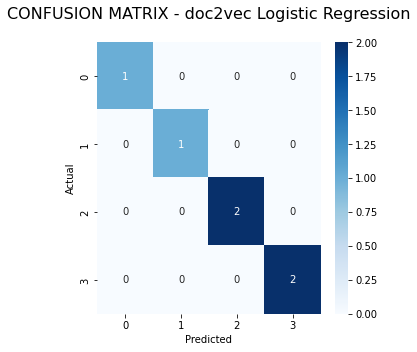

In [ ]:
print(y_test,y_pred)
conf_mat_d2v = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat_d2v, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - doc2vec Logistic Regression\n",size=16);